In [2]:
import json, requests

#getting data from url, extending limit
#Vacant and Abandoned Buildings - Violations from Chicago Data Portal

endpoint = 'https://data.cityofchicago.org/resource/kc9i-wq85.json?$limit=999999999'

response = requests.get(endpoint)

data = json.loads(response.content)

/Users/allenyou/Desktop/Spring 2025/JOUR 390/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
import pandas as pd

#converting to DataFrame
df = pd.DataFrame(data)
df.columns

Index(['docket_number', 'violation_number', 'issued_date',
       'issuing_department', 'last_hearing_date', 'property_address',
       'violation_type', 'entity_or_person_s_', 'disposition_description',
       'total_fines', 'total_administrative_costs', 'interest_amount',
       'collection_costs_or_attorney_fees', 'court_cost',
       'original_total_amount_due', 'total_paid', 'current_amount_due',
       'latitude', 'longitude', 'location', ':@computed_region_rpca_8um6',
       ':@computed_region_vrxf_vc4k', ':@computed_region_6mkv_f3dw',
       ':@computed_region_bdys_3d7i', ':@computed_region_43wa_7qmu'],
      dtype='object')

<Axes: xlabel='year', ylabel='fines'>

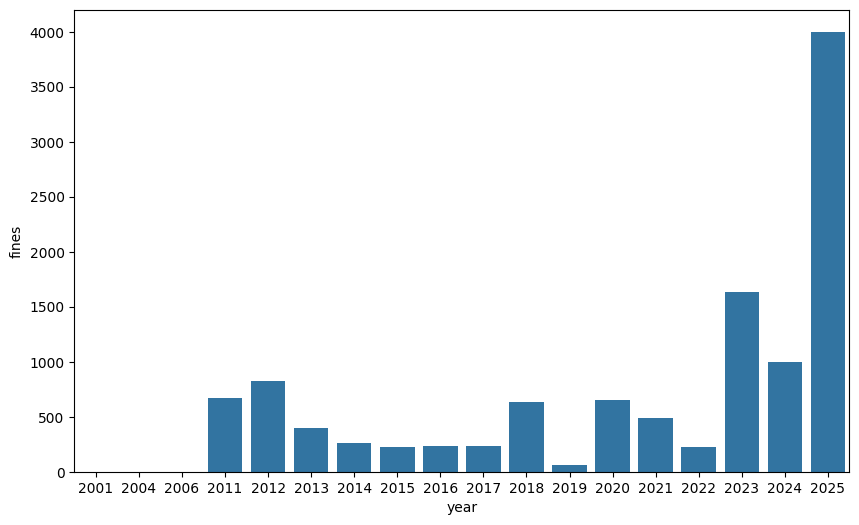

In [7]:
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10, 6))

#converting fines into integers
df['fines'] = df['total_fines'].apply(lambda x: int(x))

#formatting the date into datetime, and then extracting the year
df['format_date'] = df['issued_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%f'))
df['year'] = df['format_date'].apply(lambda x: x.year)

#graphing amount of fines given per year
sns.barplot(data = df, x = 'year', y = 'fines', errorbar = None)

#significant rise in fines over past three years